# Question 1


In [1]:
import numpy as np

In [2]:
import pandas as pd

In [8]:
users = pd.read_csv(r'C:\Users\sarat\OneDrive\Desktop\docss\dataq1.csv',sep='|' )
users.head(20)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [9]:
users[["age", "occupation"]].groupby("occupation").mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [11]:
def count(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
    
users['count_num'] = users['gender'].apply(count)

ratio = users.groupby('occupation').count_num.sum() / users.occupation.value_counts() * 100 

ratio.sort_values(ascending = False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

In [12]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [13]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [14]:
gender_occup_count = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

occup_count = users.groupby(['occupation']).agg('count')

occup_gender_percent = gender_occup_count.div(occup_count, level = "occupation") * 100

occup_gender_percent.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2

In [2]:
import numpy as np
import pandas as pd


In [3]:
euro12 = pd.read_csv(r'C:\Users\sarat\OneDrive\Desktop\docss\euro.csv')
euro12.head(20)


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [4]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

# How many team participated in the Euro2012?

In [7]:
total_team = euro12['Team'].count()
print(total_team, "teams participated in the Euro2012")

16 teams participated in the Euro2012


# What is the number of columns in the dataset?

In [11]:
columns = len(euro12.axes[1])
print("Number of Columns: ", columns)

Number of Columns:  35


# View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [15]:
team  = pd.DataFrame(euro12, columns = ['Team', 'Yellow Cards', 'Red Cards'])
team

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


# Sort the teams by Red Cards, then to Yellow Cards

In [16]:
team.sort_values(by=['Yellow Cards', 'Red Cards'])
team

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


# Calculate the mean Yellow Cards given per Team

In [24]:
Yellow_card = team['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team:", Yellow_card)

Mean Yellow Cards given per Team: 7.4375


# Filter teams that scored more than 6 goals

In [22]:


goals6= euro12['Goals'] > 6
euro12[goals6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


# Select the teams that start with G

In [23]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


# Select the first 7 columns

In [25]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


# Select all columns except the last 3

In [26]:
euro12.loc[:, euro12.columns != -3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


# Present only the Shooting Accuracy from England, Italy and Russia

In [27]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [28]:
import numpy as np
import pandas as pd
import random

# Create 3 differents Series, each of length 100, as follows:

In [34]:
series1 = pd.Series(np.random.randint(1,5,100))
series2 = pd.Series(np.random.randint(1,4,100))
series3 = pd.Series(np.random.randint(10000,30000,100))

In [35]:
series1

0     3
1     1
2     3
3     4
4     4
     ..
95    3
96    3
97    1
98    2
99    2
Length: 100, dtype: int32

In [36]:
series2

0     3
1     1
2     2
3     1
4     2
     ..
95    1
96    1
97    1
98    1
99    3
Length: 100, dtype: int32

In [37]:
series3

0     11271
1     29382
2     11163
3     19349
4     14777
      ...  
95    22530
96    27885
97    12212
98    10344
99    24382
Length: 100, dtype: int32

# Create a DataFrame by joinning the Series by column

In [43]:
combo_ser = {"Series1": series1,
        "Series2": series2,
        "Series3": series3}
combo_df = pd.concat(combo_ser, axis = 1)
combo_df.head(10)

,Series1,Series2,Series3
0,3,3,11271
1,1,1,29382
2,3,2,11163
3,4,1,19349
4,4,2,14777
5,2,1,13147
6,3,2,14869
7,3,3,10361
8,3,1,23964
9,2,2,15266


In [44]:
combo_df.rename(columns = {'Series1' : 'bedrs', 'Series2' : 'bathrs', 'Series3' : 'price_sqr_meter'}, inplace = True)
combo_df.head(10)

,bedrs,bathrs,price_sqr_meter
0,3,3,11271
1,1,1,29382
2,3,2,11163
3,4,1,19349
4,4,2,14777
5,2,1,13147
6,3,2,14869
7,3,3,10361
8,3,1,23964
9,2,2,15266


# Create a one column DataFrame with the values of the 3 Series and assign it to bigcolumn


In [45]:
bigcols = pd.DataFrame(combo_df['bedrs'].astype(str) + combo_df['bathrs'].astype(str) + combo_df['price_sqr_meter'].astype(str))

print(bigcols)

print(type(bigcols))

          0
0   3311271
1   1129382
2   3211163
3   4119349
4   4214777
..      ...
95  3122530
96  3127885
97  1112212
98  2110344
99  2324382

[100 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


Ops it seems it is going only until index 99. Is it true?

The maximum rows at a time is hundred .So its true since it count from zero

 Reindex the DataFrame so it goes from 0 to 299

In [47]:
bigcols.reindex(range(0, 300))

,0
0,3311271
1,1129382
2,3211163
3,4119349
4,4214777
...,...
295,NaN
296,NaN
297,NaN
298,NaN


# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


In [53]:
data = pd.read_csv(r'C:\Users\sarat\actor_kill_counts.csv')
data.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


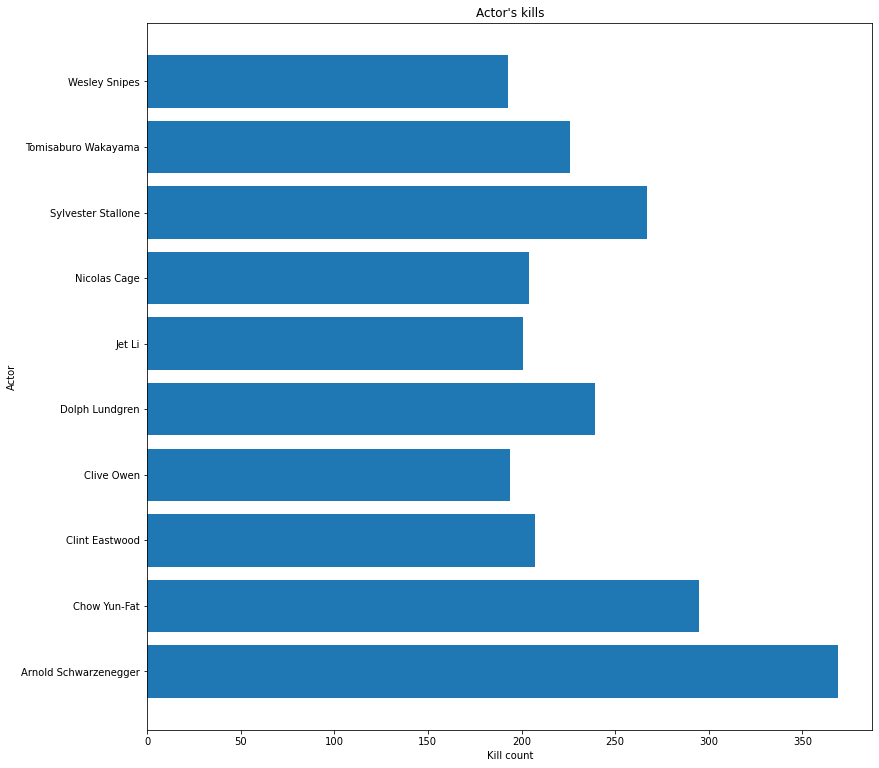

In [63]:
fig= plt.figure(figsize=(13,13))
plt.barh(df['Actor'], df['Count'])
plt.ylabel("Actor")
plt.xlabel("Kill count")
plt.title("Actor's kills")
plt.show()

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.

In [106]:
data = pd.read_csv('romemp.csv')
data.head(10)

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
5,Galba,0.58,Assassinated
6,Otho,0.25,Suicide
7,Vitellius,0.67,Assassinated
8,Vespasian,10.00,Natural causes
9,Titus,3.25,Illness


In [107]:
death_rom = data[data['Cause_of_Death']== 'Assassinated']
death_rom.head(10)

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated
22,Geta,3.00,Assassinated
24,Elagabalus,3.75,Assassinated
25,Severus Alexander,13.00,Assassinated


In [108]:
percent_assasination = data.groupby(['Cause_of_Death'])['Cause_of_Death'].count().transform(lambda x: x/x.sum()*100)
percent_death = pd.DataFrame(percent_assasination)
percent_death.rename(columns={'Cause_of_Death': "Percent_Cause_of_death" }, inplace = True)
display(percent_death.head(10))
percent_death['Cause_of_Death'] = percent_death.index

,Percent_Cause_of_death
Cause_of_Death,
Assassinated,32.352941
Died in captivity,1.470588
Executed,4.411765
Illness,7.352941
Killed in battle,11.764706
Natural causes,23.529412
Possibly assassinated,11.764706
Suicide,7.352941


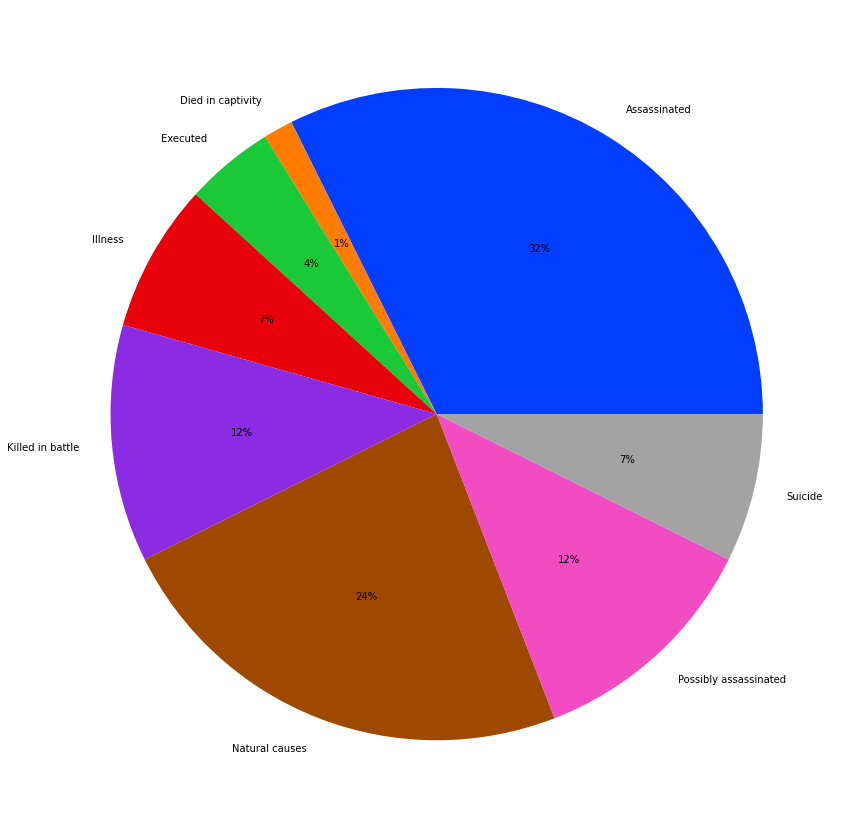

In [87]:
data=percent_death['Percent_Cause_of_death']
keys = percent_death['Cause_of_Death']
palette_color = sns.color_palette('bright')
  

plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  

plt.show()
plt.rcParams ["figure.figsize"] = (15,10)


# Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

In [93]:
data = pd.read_csv('arcade.csv')
data.head(10)

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


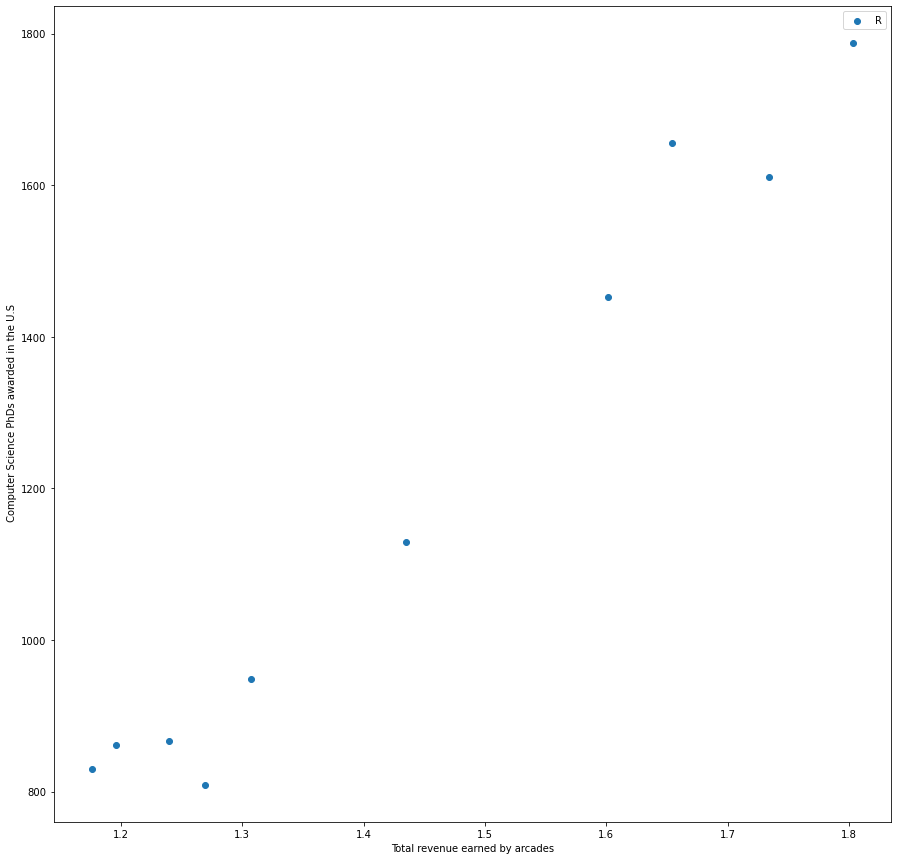

In [103]:
groups = data.groupby('Year')

rev_arcade = data['Total Arcade Revenue (billions)'].values
awarded_doctors = data['Computer Science Doctorates Awarded (US)'].values
fig= plt.figure(figsize=(15,15))
plt.scatter(rev_arcade,awarded_doctors)

plt.legend("Relationship between the total revenue earned")
plt.xlabel("Total revenue earned by arcades")
plt.ylabel(" Computer Science PhDs awarded in the U.S")
plt.show()